In [1]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np

from dotenv import load_dotenv
load_dotenv()
DATASET_PATH=os.getenv("DATASET_DIRECTORY")
CONFIG_DIRECTORY = os.getenv("CONFIG_DIRECTORY")

sys.path.append("../")
from mmwave_radar_processing.config_managers.cfgManager import ConfigManager
from cpsl_datasets.cpsl_ds import CpslDS

from mmwave_model_integrator.encoders.radcloud_encoder import RadCloudEncoder
from mmwave_model_integrator.plotting.plotter_range_az_encoder import PlotterRangeAzEncoder

In [2]:
cfg_manager = ConfigManager()

cfg_path = os.path.join(CONFIG_DIRECTORY,"RadCloud.cfg")
cfg_manager.load_cfg(cfg_path)
cfg_manager.compute_radar_perforance(profile_idx=0)

In [3]:
#load the dataset
dataset_name = "cpsl_drive"
dataset_path = os.path.join(DATASET_PATH,"radCloud_comp_datasets",dataset_name)
dataset = CpslDS(
    dataset_path=dataset_path,
    radar_folder="radar_0",
    lidar_folder="lidar",
    camera_folder="camera",
    imu_orientation_folder="imu_data",
    imu_full_folder="imu_data_full"
)

found 385 radar samples
found 385 lidar samples
found 385 camera samples
found 385 imu (orientation only) samples
found 385imu (full data) samples
found 385 vehicle velocity samples


In [4]:
plotter = PlotterRangeAzEncoder(config_manager=cfg_manager)

radcloud_encoder = RadCloudEncoder(
    config_manager=cfg_manager,
    max_range_bin=64,
    num_chirps_to_encode=40,
    radar_fov= [-0.87,0.87],
    range_az_num_angle_bins=64,
    power_range_dB=[60,105]
)

In [5]:
adc_cube = dataset.get_radar_data(idx=0)

rng_az_resp = radcloud_encoder.encode(adc_cube)

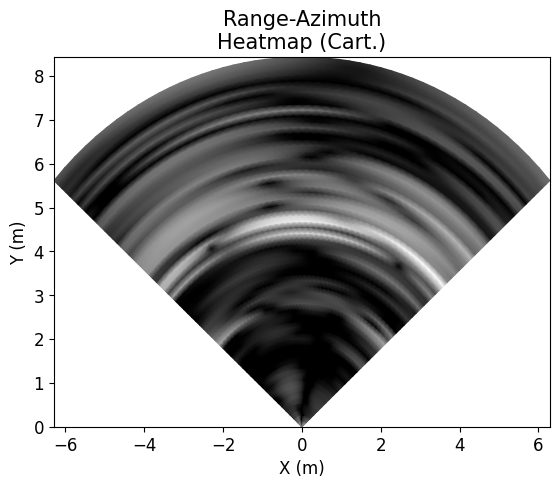

In [6]:
plotter.plot_range_az_resp_cart(
    resp=rng_az_resp[:,:,39],
    range_az_encoder=radcloud_encoder,
    cmap="gray",
    ax=None,
    show=True
)

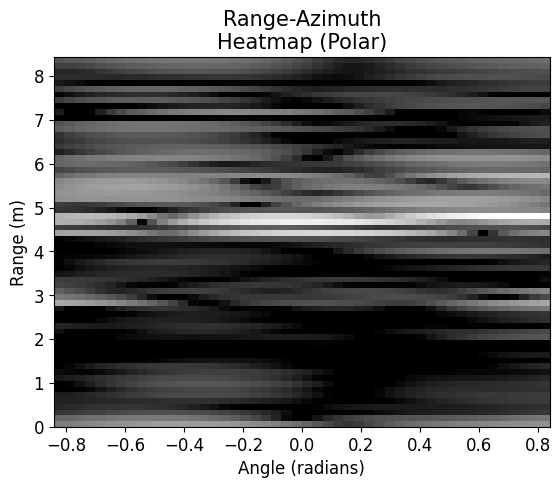

In [7]:
plotter.plot_range_az_resp_polar(
    resp=rng_az_resp[:,:,39],
    range_az_encoder=radcloud_encoder,
    cmap="gray",
    ax=None,
    show=True
)